The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


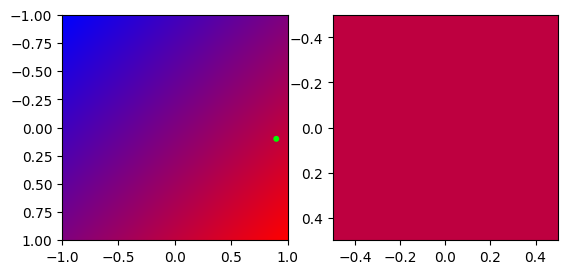

In [163]:
%load_ext autoreload
%autoreload 2

from einops import rearrange
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from torch import Tensor
from text3d2video.util import sample_feature_map
from visual_tests.testing_utils import gradient_img
import torchvision.transforms.functional as TF

image = gradient_img(res=200)
image = TF.to_tensor(image)

coord = Tensor([0.9, 0.1])

sample = sample_feature_map(image, coord.unsqueeze(0))[0]

# plot image, point and color
fig, axs = plt.subplots(1, 2)

ax_img = axs[0]
ax_color = axs[1]

ax_img.imshow(TF.to_pil_image(image), extent=[-1, 1, 1, -1])
ax_color.imshow(rearrange(sample, 'c -> 1 1 c'))

res = image.shape[-1]
circle = Circle(
    coord, 0.02, 
    color="lime"
)
ax_img.add_patch(circle)